In [2]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
data_marker = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
        data_marker.append("x")
    elif classification[i] == 2:
        data_colour.append("b")
        data_marker.append("o")
    elif classification[i] == 3:
        data_colour.append("g")
        data_marker.append("*")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 0
    j = 1
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==0 and j==1:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)

In [5]:
import sklearn
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

In [2]:
accuracy = []

for i in range(10000):
    xData = tData[i][0]
    yData = tData[i][1]
    nData = np.vstack((xData, yData)).T
    
    clf = DecisionTreeClassifier(random_state=1)
    clf.fit(nData, classification)

    score = clf.score(nData, classification)
    accuracy.append(score)


x = list(range(0, len(accuracy)))

In [3]:
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [4]:
xData = tData[0][0]
yData = tData[0][1]
nData = np.vstack((xData, yData)).T

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

test_acc = []
total_acc = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)  

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)  

    #print(confusion_matrix(y_test, y_pred))  
    #print(classification_report(y_test, y_pred))


    conf_mat = confusion_matrix(y_test, y_pred)
    total_sum = np.sum(conf_mat)
    trace_sum = np.trace(conf_mat)
    test_set_acc = trace_sum / total_sum
    test_acc.append(test_set_acc)
    

    score = clf.score(nData, classification)
    total_acc.append(score)
    

    #print(score)
    #print(test_set_acc)

    #sklearn.tree.export_graphviz(clf, out_file="/home/dom/Documents/MPhys/TheGrandTour/DecTree.dot")


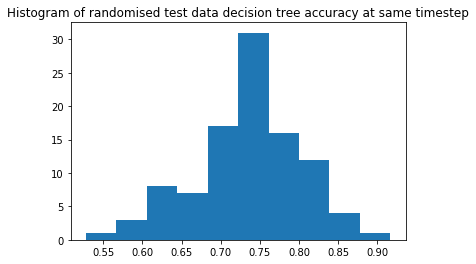

In [6]:
plt.hist(test_acc, bins=10)
plt.title("Histogram of randomised test data decision tree accuracy at same timestep")
plt.savefig("DecTree_testdata_acc.png", dpi=300)
plt.show()


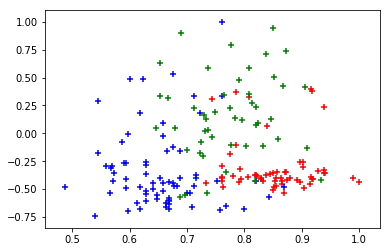

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xData, yData, color=data_colour, marker="+")
plt.show()

In [7]:
np.shape(nData)

(178, 2)

In [47]:
def PlotMax(timestep, depth):
    xData = tData[int(timestep)][0]
    yData = tData[int(timestep)][1]

    X = np.vstack((xData, yData)).T
    
    X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)  
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(xData, yData, color=data_colour, marker="+")

    plt.show()


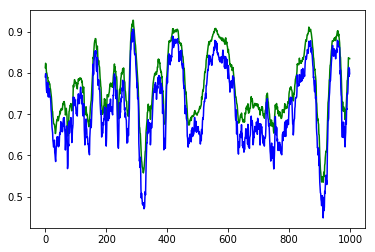

depth: 2
0.9069444444444444  at timestep: 288
0.9283707865168543  at timestep: 288


<Figure size 432x288 with 0 Axes>

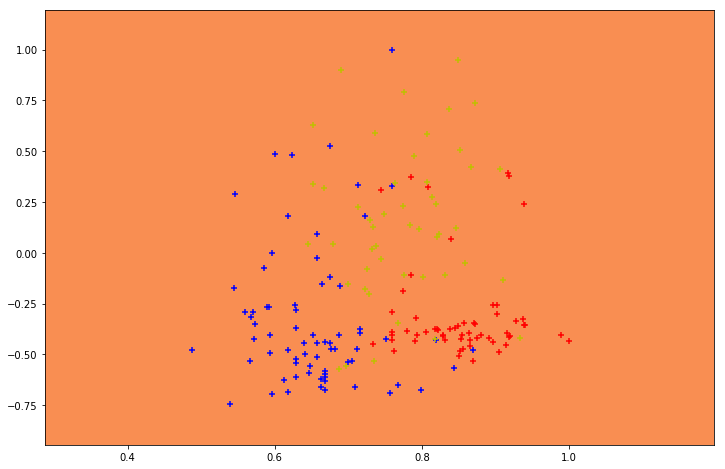

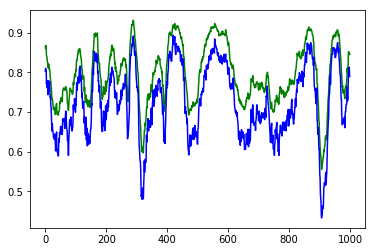

depth: 3
0.8930555555555554  at timestep: 420
0.9308988764044946  at timestep: 289


<Figure size 432x288 with 0 Axes>

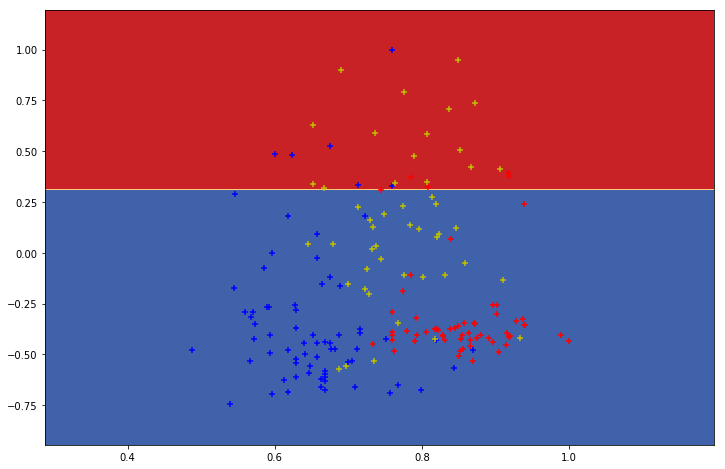

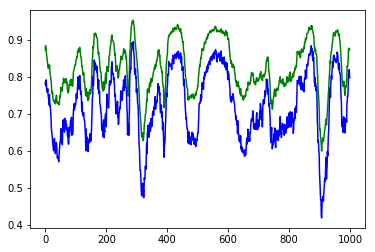

depth: 4
0.8961111111111112  at timestep: 289
0.9538202247191012  at timestep: 289


<Figure size 432x288 with 0 Axes>

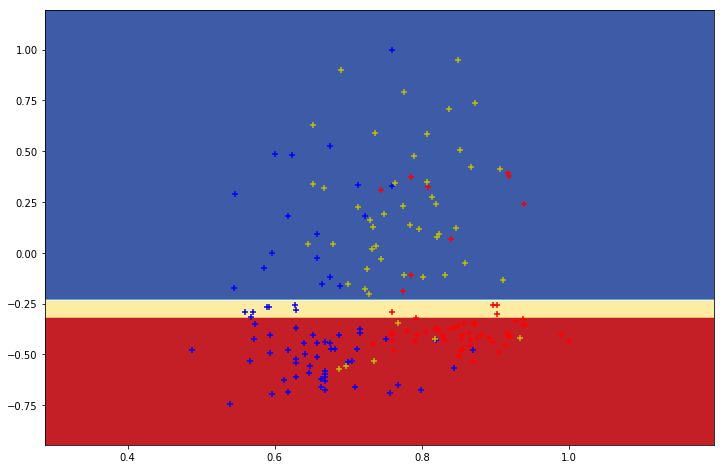

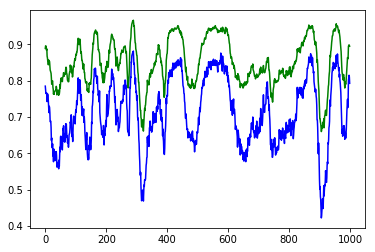

depth: 5
0.8816666666666666  at timestep: 289
0.9664606741573033  at timestep: 289


<Figure size 432x288 with 0 Axes>

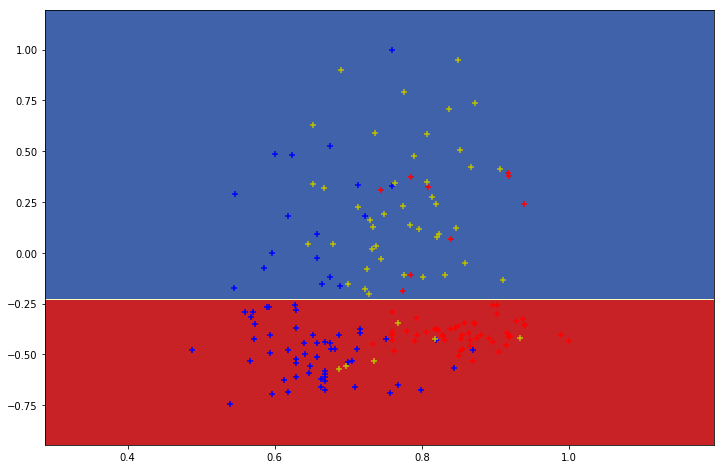

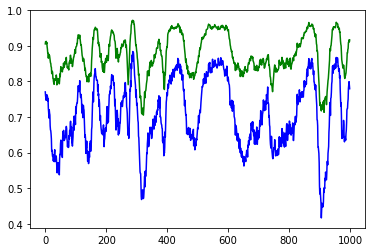

depth: 6
0.8838888888888888  at timestep: 287
0.971797752808989  at timestep: 287


<Figure size 432x288 with 0 Axes>

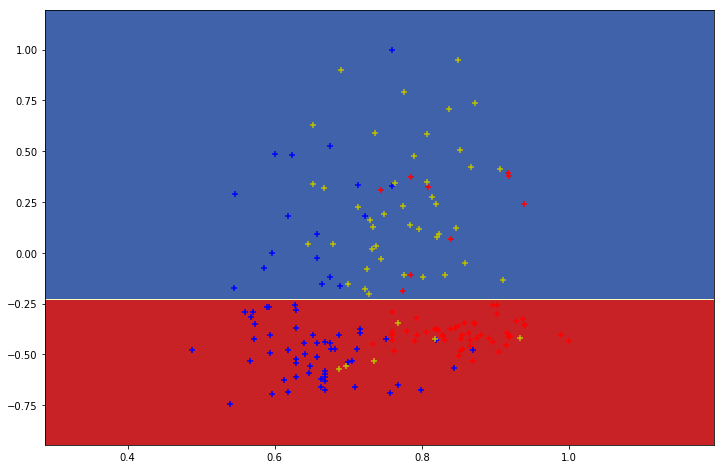

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

for depth in range(2, 7):
    test_accuracy = []
    total_accuracy = []
    for t in range(1000):
        xData = tData[t][0]
        yData = tData[t][1]
        nData = np.vstack((xData, yData)).T

        test_acc = []
        total_acc = []

        for i in range(100):
            X_train, X_test, y_train, y_test = train_test_split(nData,
                                                                classification,
                                                                test_size=0.20)  
            clf = DecisionTreeClassifier(max_depth=depth)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)  

            conf_mat = confusion_matrix(y_test, y_pred)
            total_sum = np.sum(conf_mat)
            trace_sum = np.trace(conf_mat)
            test_set_acc = trace_sum / total_sum
            test_acc.append(test_set_acc)

            score = clf.score(nData, classification)
            total_acc.append(score)

        test_accuracy.append(np.mean(test_acc))
        total_accuracy.append(np.mean(total_acc))

    x = list(range(1000))
    plt.plot(x, total_accuracy, '-', marker=" ", color="g")
    plt.plot(x, test_accuracy, '-', marker=" ", color="b")
    plt.show()
    
    print("depth: " + str(depth))
    print(np.max(test_accuracy), " at timestep: " + str(test_accuracy.index(np.max(test_accuracy))))
    print(np.max(total_accuracy), " at timestep: " + str(total_accuracy.index(np.max(total_accuracy))))
    
    PlotMax(np.max(test_accuracy), depth)
    
    


In [ ]:
x = list(range(1000))
plt.plot(x, total_accuracy, '-', marker=" ", color="g")
plt.plot(x, test_accuracy, '-', marker=" ", color="b")

print(np.max(test_accuracy))
print(np.max(total_accuracy))

In [ ]:
# compare limiting decision tree number of levels

xData = tData[0][0]
yData = tData[0][1]
nData = np.vstack((xData, yData)).T

test_accuracy = []
total_accuracy = []

for j in range(2, 15):
    test_acc = []
    total_acc = []
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(nData,
                                                            classification,
                                                            test_size=0.20)  

        clf = DecisionTreeClassifier(max_depth=j)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)  

        conf_mat = confusion_matrix(y_test, y_pred)
        total_sum = np.sum(conf_mat)
        trace_sum = np.trace(conf_mat)
        test_set_acc = trace_sum / total_sum
        test_acc.append(test_set_acc)

        score = clf.score(nData, classification)
        total_acc.append(score)

    test_accuracy.append(np.mean(test_acc))
    print(j)
    print(np.mean(test_acc))
    print("-----------")

print(test_accuracy)

plt.plot(test_accuracy)

In [ ]:
import random
timestep = random.sample(range(0, 999), 30)

best_depth_list = []

for t in timestep:
    
    xData = tData[t][0]
    yData = tData[t][1]
    nData = np.vstack((xData, yData)).T

    test_accuracy = []
    total_accuracy = []
    
    best_depth = 0
    best_depth_score = 0

    for j in range(2, 9):
        test_acc = []
        total_acc = []
        for i in range(1000):
            X_train, X_test, y_train, y_test = train_test_split(nData,
                                                                classification,
                                                                test_size=0.20)  

            clf = DecisionTreeClassifier(max_depth=j)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)  

            conf_mat = confusion_matrix(y_test, y_pred)
            total_sum = np.sum(conf_mat)
            trace_sum = np.trace(conf_mat)
            test_set_acc = trace_sum / total_sum
            test_acc.append(test_set_acc)

            score = clf.score(nData, classification)
            total_acc.append(score)
            
        if best_depth_score < np.mean(test_acc):
            best_depth = j
            
        test_accuracy.append(np.mean(test_acc))
    print("timestep: " + str(t))    
    plt.plot(test_accuracy)
    plt.show()
    
    best_depth_list.append(best_depth)


In [ ]:
best_depth_list

<Figure size 432x288 with 0 Axes>

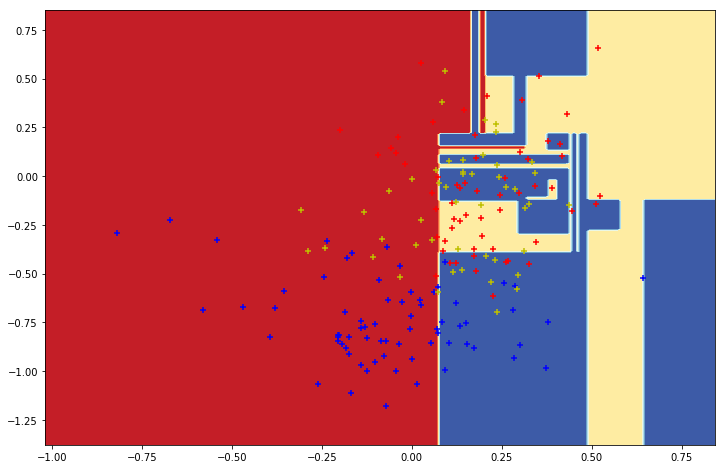

overall score: 0.9157303370786517


<Figure size 432x288 with 0 Axes>

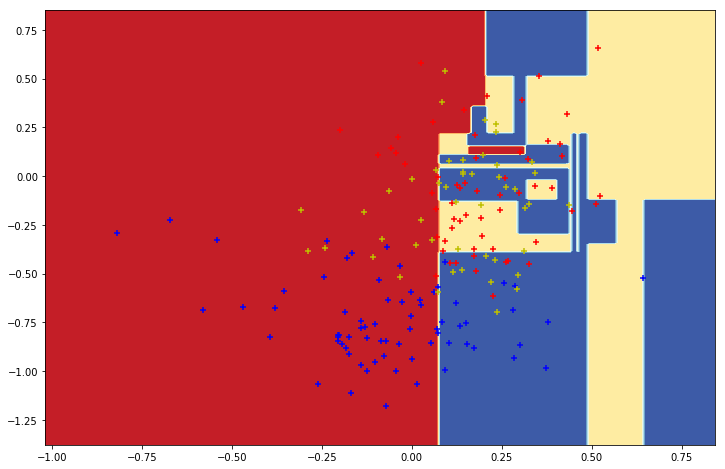

overall score: 0.9213483146067416


<Figure size 432x288 with 0 Axes>

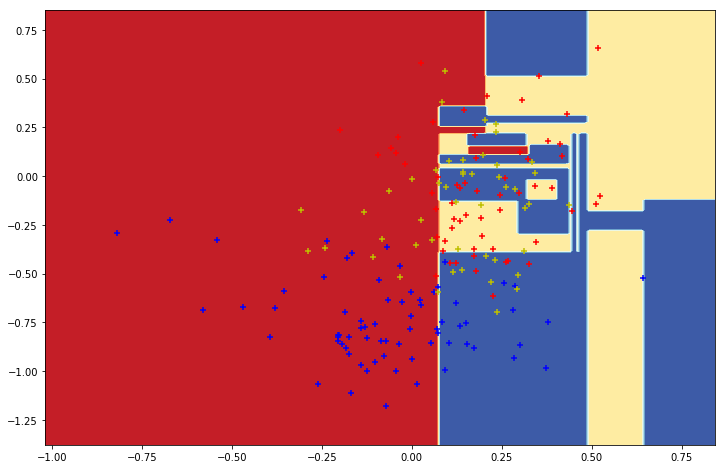

overall score: 0.9157303370786517


<Figure size 432x288 with 0 Axes>

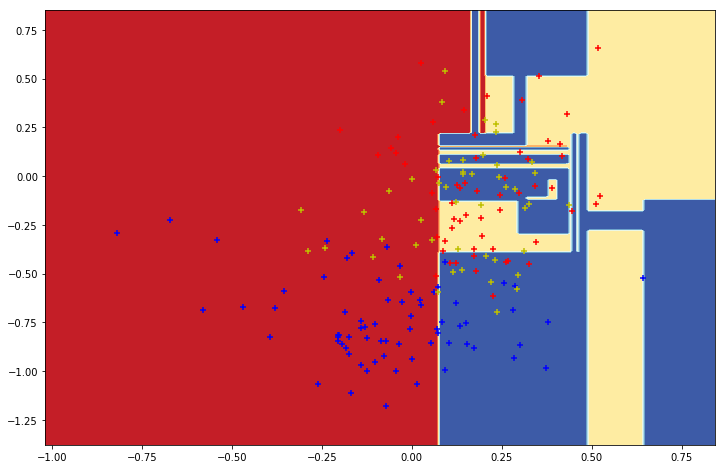

overall score: 0.9157303370786517


<Figure size 432x288 with 0 Axes>

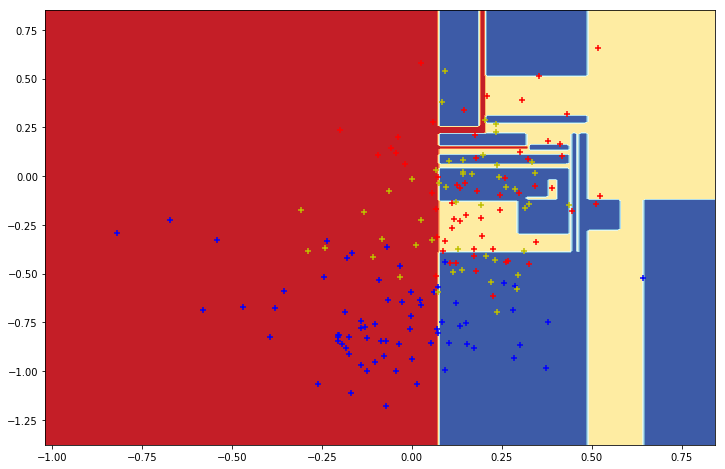

overall score: 0.9101123595505618


In [35]:
for i in range(5):
    time = 482

    xData = tData[time][0]
    yData = tData[time][1]

    X = np.vstack((xData, yData)).T


    """ X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)
    """
   # X_train, y_train = train_test_split(nData, classification)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)


    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(xData, yData, color=data_colour, marker="+")

    plt.show()


    #conf_mat = confusion_matrix(y_test, y_pred)
    #total_sum = np.sum(conf_mat)
    #trace_sum = np.trace(conf_mat)
    #test_set_acc = trace_sum / total_sum

    score = clf.score(nData, classification)
    print("overall score: " + str(score))
   # print("test data classification: " + str(test_set_acc))


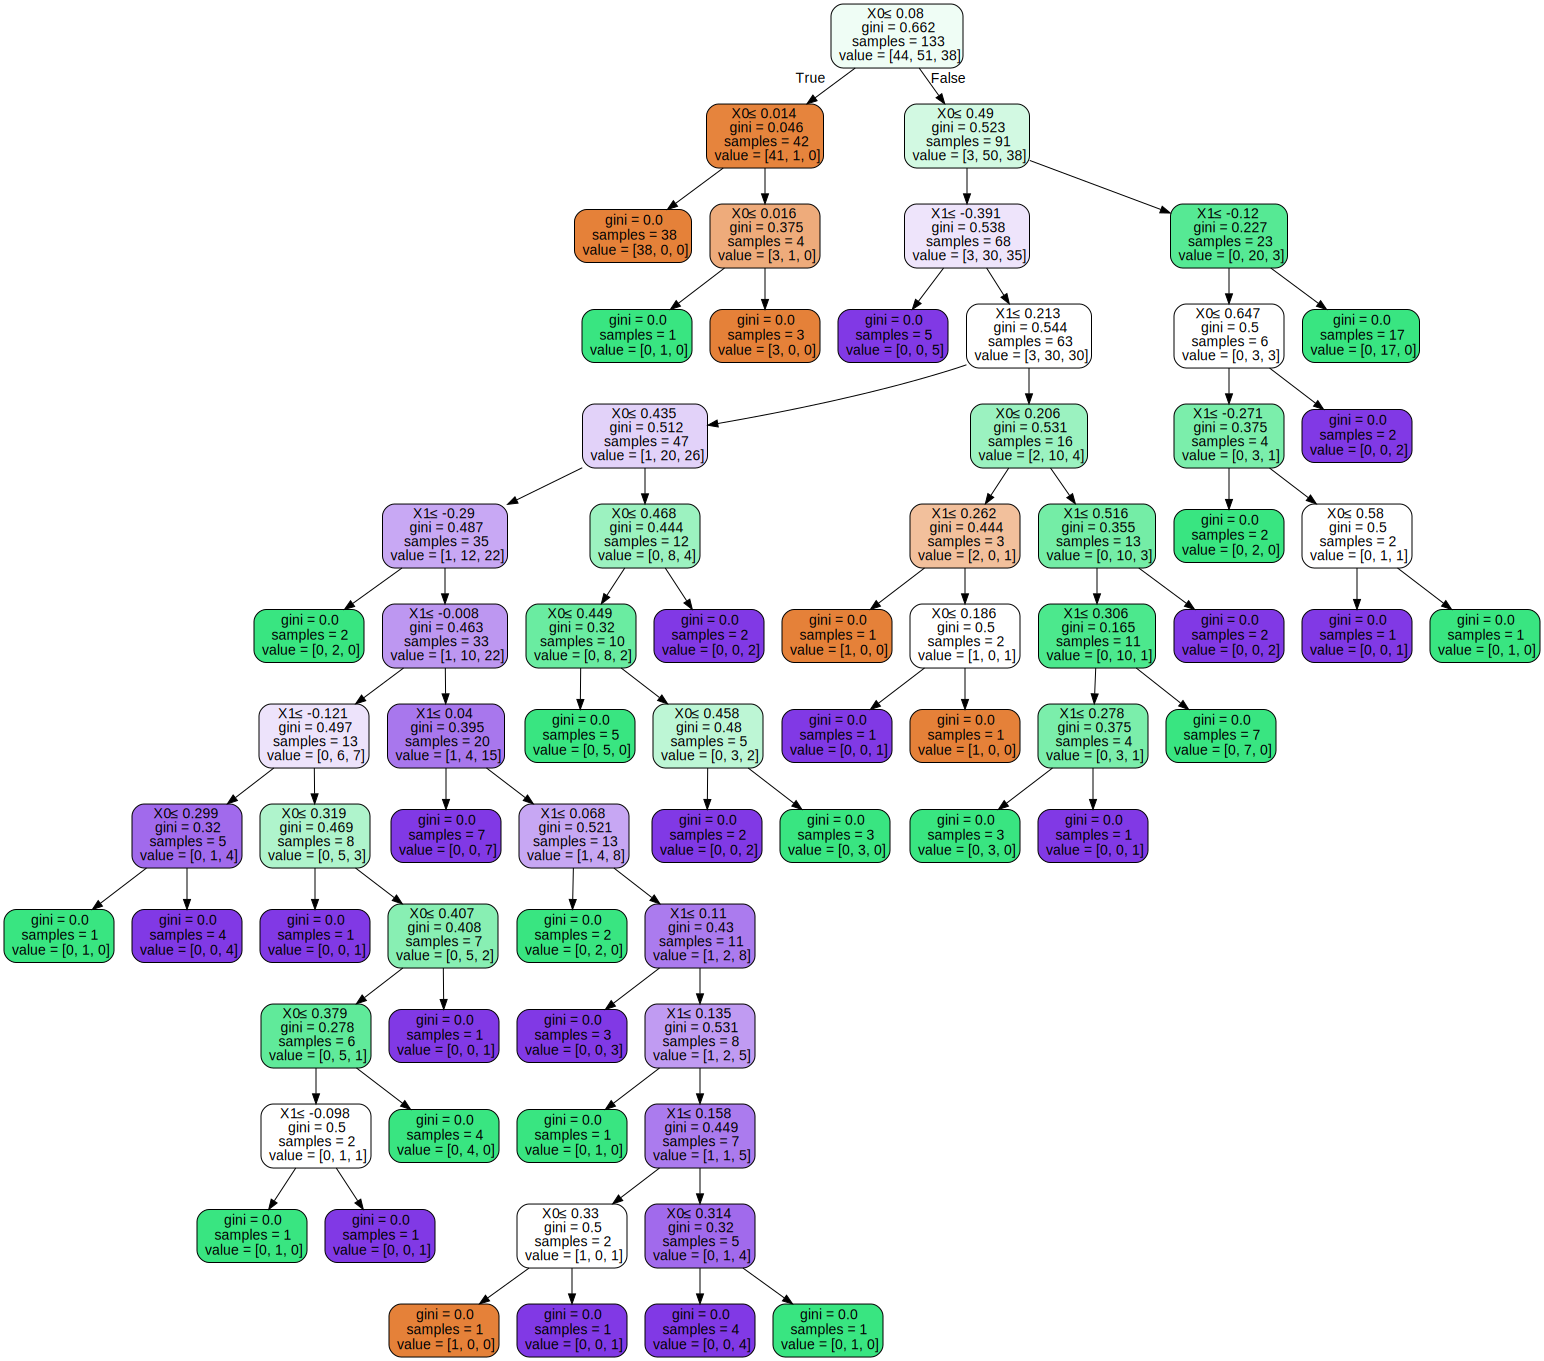

In [42]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,
                                filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

xy_points = []
xarray = []
yarray = []
for i in range(100):
    x = (2 * i - 100) / 100
    xarray.append(x)
    for j in range(100):
        y = (2 * j - 100) / 100
        yarray.append(y)
        xy_points.append([x, y])
        
        
xarray = np.asarray(xarray)
xy_points = np.asarray(xy_points)
yarray = np.asarray(yarray)

In [6]:
import matplotlib.lines as mlines

classification = np.array(classification)
def plot_func(timestep):

    # format input data
    xData = tData[int(timestep)][0]
    yData = tData[int(timestep)][1]
    trainingData = np.vstack((xData, yData)).T

    """    X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)
    """
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(trainingData, classification)

    predictions = clf.predict(xy_points) 
    
    y_pred = clf.predict(trainingData)

    score = sklearn.metrics.accuracy_score(classification, y_pred)
    print("accuracy score: " + str(score))
    score = sklearn.metrics.cohen_kappa_score(classification, y_pred)
    print("cohen kappa score: " + str(score))

    xy_colour = []
    for i in range(len(predictions)):
        if predictions[i] == 1:
            xy_colour.append("r")
        elif predictions[i] == 2:
            xy_colour.append("b")
        elif predictions[i] == 3:
            xy_colour.append("g")

    x, y = zip(*xy_points)

    plt.figure(figsize=(12, 8))
    
    plt.scatter(x, y, color = xy_colour)
    
    
    for i in range(len(xData)):
        if int(clf.predict([[xData[i], yData[i]]])) == classification[i]:
            plt.scatter(xData[i], yData[i], color = 'black', marker = data_marker[i])
        else:
            plt.scatter(xData[i], yData[i], color = data_colour[i], marker = data_marker[i])
    blue_patch = mlines.Line2D([], [], color='blue', marker='o', linestyle="")
    green_patch = mlines.Line2D([], [], color='green', marker='*', linestyle="")
    red_patch = mlines.Line2D([], [], color='red', marker='x', linestyle="")
    
    #xmax, xmin = (max(xData) + 0.1, min(xData) - 0.1)
    #ymax, ymin = (max(yData) + 0.1, min(yData) - 0.1)

    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)

    plt.legend(handles=[blue_patch, red_patch, green_patch])
    plt.show()
    



        
interact_manual(plot_func, timestep = widgets.FloatSlider(value = 1,
                                                   min = 0,
                                                   max = 1000 - 1,
                                                   step = 1))

interactive(children=(FloatSlider(value=1.0, description='timestep', max=999.0, step=1.0), Button(description=…

<function __main__.plot_func(timestep)>

In [76]:
a = clf.predict([[1, 1]])
print(int(a))

3


In [82]:
1 - (23 / 177)

0.8700564971751412

In [104]:
classification = classification.astype(int)

In [8]:
classification = np.array(classification)
def plot_func(timestep):

    # format input data
    xData = tData[int(timestep)][0]
    yData = tData[int(timestep)][1]
    trainingData = np.vstack((xData, yData)).T

    """    X_train, X_test, y_train, y_test = train_test_split(nData,
                                                        classification,
                                                        test_size=0.20)
    """
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(trainingData, classification)

    predictions = clf.predict(xy_points) 
    
    y_pred = clf.predict(trainingData)

    score = sklearn.metrics.accuracy_score(classification, y_pred)
    print("accuracy score: " + str(score))
    score = sklearn.metrics.cohen_kappa_score(classification, y_pred)
    print("cohen kappa score: " + str(score))

    xy_colour = []
    for i in range(len(predictions)):
        if predictions[i] == 1:
            xy_colour.append("r")
        elif predictions[i] == 2:
            xy_colour.append("b")
        elif predictions[i] == 3:
            xy_colour.append("g")
    
    x = np.arange(-1.5, 1.5, 0.01)
    y = np.arange(-1.5, 1.5, 0.01)
    xx, yy = np.meshgrid(x, y)
    z = np.zeros((len(y),len(x)))

    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = int(clf.predict([[x[i],y[j]]]))

    plt.figure(figsize=(12,8))

    plt.contourf(xx, yy, z, colors = ("r", "b", "g"), 
                 levels = 2)
    
    for i in range(len(xData)):
        if int(clf.predict([[xData[i], yData[i]]])) == classification[i]:
            plt.scatter(xData[i], yData[i], color = 'black', marker = data_marker[i])
        else:
            plt.scatter(xData[i], yData[i], color = data_colour[i], marker = data_marker[i])
    blue_patch = mlines.Line2D([], [], color='blue', marker='o', linestyle="")
    green_patch = mlines.Line2D([], [], color='green', marker='*', linestyle="")
    red_patch = mlines.Line2D([], [], color='red', marker='x', linestyle="")
    
    xmax, xmin = (max(xData) + 0.1, min(xData) - 0.1)
    ymax, ymin = (max(yData) + 0.1, min(yData) - 0.1)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.legend(handles=[blue_patch, red_patch, green_patch])
    plt.show()
    



        
interact_manual(plot_func, timestep = widgets.FloatSlider(value = 1,
                                                   min = 0,
                                                   max = 1000 - 1,
                                                   step = 1))

interactive(children=(FloatSlider(value=1.0, description='timestep', max=999.0, step=1.0), Button(description=…

<function __main__.plot_func(timestep)>

In [124]:
u = np.linspace(-1.5, 1.5, 300)
x, y = np.meshgrid(u, u)
#z = clf.predict(x, y)


In [131]:
x, y = zip(*xy_points)

In [140]:
clf.predict(xy_points)

array([2., 2., 2., ..., 3., 3., 3.])

In [139]:
xy_points

array([[-1.  , -1.  ],
       [-1.  , -0.98],
       [-1.  , -0.96],
       ...,
       [ 0.98,  0.94],
       [ 0.98,  0.96],
       [ 0.98,  0.98]])

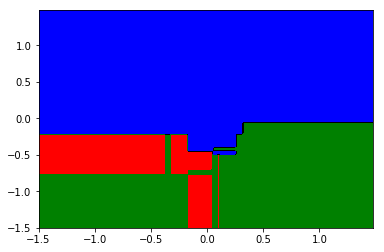

In [214]:
x = np.arange(-1.5, 1.5, 0.02)
y = np.arange(-1.5, 1.5, 0.02)
xx, yy = np.meshgrid(x, y)
z = np.zeros((len(y),len(x)))

for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = int(clf.predict([[x[i],y[j]]]))
    
plt.contourf(xx, yy, z, colors = ("r", "g", "black", "b"), levels = 3)

In [180]:
clf.predict([[1,2]])

array([3.])

In [229]:
xx, yy

(array([[-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48],
        [-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48],
        [-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48],
        ...,
        [-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48],
        [-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48],
        [-1.5 , -1.48, -1.46, ...,  1.44,  1.46,  1.48]]),
 array([[-1.5 , -1.5 , -1.5 , ..., -1.5 , -1.5 , -1.5 ],
        [-1.48, -1.48, -1.48, ..., -1.48, -1.48, -1.48],
        [-1.46, -1.46, -1.46, ..., -1.46, -1.46, -1.46],
        ...,
        [ 1.44,  1.44,  1.44, ...,  1.44,  1.44,  1.44],
        [ 1.46,  1.46,  1.46, ...,  1.46,  1.46,  1.46],
        [ 1.48,  1.48,  1.48, ...,  1.48,  1.48,  1.48]]))